In [1]:
import pandas as pd
import numpy as np
import numpy as np
import matplotlib.pyplot as plt

from datetime import datetime 
from sqlalchemy import create_engine


In [2]:
# loading netflix data
raw_netflix_path = "./Resources/netflix.csv"
raw_netflix_pd = pd.read_csv(raw_netflix_path)

In [3]:
transformed_netflix = raw_netflix_pd[[
    "show_id", 'type', 'title', 'date_added', 'rating', 'listed_in']].copy()

# transformed_netflix

In [4]:
transformed_netflix = transformed_netflix.rename(columns={'listed_in': 'genre', 'title':'show_name'})
transformed_netflix['id'] = transformed_netflix.index
transformed_netflix = transformed_netflix.dropna()
transformed_netflix

,show_id,type,show_name,date_added,rating,genre,id
0,81145628,Movie,Norm of the North: King Sized Adventure,"September 9, 2019",TV-PG,"Children & Family Movies, Comedies",0
1,80117401,Movie,Jandino: Whatever it Takes,"September 9, 2016",TV-MA,Stand-Up Comedy,1
2,70234439,TV Show,Transformers Prime,"September 8, 2018",TV-Y7-FV,Kids' TV,2
3,80058654,TV Show,Transformers: Robots in Disguise,"September 8, 2018",TV-Y7,Kids' TV,3
4,80125979,Movie,#realityhigh,"September 8, 2017",TV-14,Comedies,4
...,...,...,...,...,...,...,...
6218,80162994,TV Show,Talking Tom and Friends,"April 10, 2019",TV-G,"Kids' TV, TV Comedies",6218
6219,80186475,TV Show,Pokémon the Series,"April 1, 2019",TV-Y7-FV,"Anime Series, Kids' TV",6219
6220,70272742,TV Show,Justin Time,"April 1, 2016",TV-Y,Kids' TV,6220
6221,80067942,TV Show,Terrace House: Boys & Girls in the City,"April 1, 2016",TV-14,"International TV Shows, Reality TV",6221


In [5]:
# loading hulu data
raw_hulu_path = "./Resources/hulu.csv"
raw_hulu_pd = pd.read_csv(raw_hulu_path)

In [6]:
transformed_hulu = raw_hulu_pd[[
    "show_id", 'show_type', 'show_name', 
    'show_show_rollups_auth_on_web_latest_video_added_at', 
    'show_show_rollups_current_highest_rating', 
    'show_genre']].copy()

# transformed_hulu

In [7]:
transformed_hulu = transformed_hulu.rename( \
    columns={'show_show_rollups_auth_on_web_latest_video_added_at': 'date_added', \
             'show_show_rollups_current_highest_rating':'rating'})
transformed_hulu = transformed_hulu.dropna()
transformed_hulu['id'] = transformed_hulu.index
#transformed_hulu

In [8]:
transformed_hulu_date_added =transformed_hulu.reset_index(drop=True)
transformed_hulu_date_added


,show_id,show_type,show_name,date_added,rating,show_genre,id
0,54,show,Family Guy,2017-07-22T21:15:30Z,TV-MA,Animation and Cartoons,0
1,6979,show,South Park,2016-12-08T06:32:22Z,TV-MA,Comedy,1
2,53,show,American Dad!,2017-04-12T17:34:25Z,TV-14,Comedy,2
3,389,show,Law & Order: Special Victims Unit,2017-07-21T18:09:26Z,TV-14,Drama,3
4,1603,show,Naruto Shippuden,2017-03-23T11:00:30Z,TV-14,Anime,4
...,...,...,...,...,...,...,...
955,14114,show,East Los High,2016-07-15T03:30:24Z,TV-14,Drama,995
956,1349,show,Sesame Street,2016-03-14T19:11:22Z,TV-Y,Kids,996
957,23170,show,Casual,2017-08-01T04:00:31Z,TV-MA,Comedy,997
958,16720,show,Chicago P.D.,2017-05-18T09:00:33Z,TV-14,Drama,998


In [9]:
rds_connection_string = "postgres:postgres@localhost:5432/movie_services_db"
engine = create_engine(f'postgresql://{rds_connection_string}')

In [10]:
# transformed_netflix.to_sql(name='netflix', con=engine, if_exists='append', index=False)
# transformed_hulu_date_added.to_sql(name='hulu', con=engine, if_exists='append', index=False)

In [11]:
data_netflix = pd.read_sql("select * from netflix", engine)
data_netflix

,show_id,type,show_name,date_added,rating,genre,id
0,70234439,TV Show,Transformers Prime,"September 8, 2018",TV-Y7-FV,Kids' TV,2
1,80058654,TV Show,Transformers: Robots in Disguise,"September 8, 2018",TV-Y7,Kids' TV,3
2,80163890,TV Show,Apaches,"September 8, 2017",TV-MA,"Crime TV Shows, International TV Shows, Spanis...",5
3,80117902,TV Show,Fire Chasers,"September 8, 2017",TV-MA,"Docuseries, Science & Nature TV",8
4,80244601,TV Show,Castle of Stars,"September 7, 2018",TV-14,"International TV Shows, Romantic TV Shows, TV ...",26
...,...,...,...,...,...,...,...
1952,80162994,TV Show,Talking Tom and Friends,"April 10, 2019",TV-G,"Kids' TV, TV Comedies",6218
1953,80186475,TV Show,Pokémon the Series,"April 1, 2019",TV-Y7-FV,"Anime Series, Kids' TV",6219
1954,70272742,TV Show,Justin Time,"April 1, 2016",TV-Y,Kids' TV,6220
1955,80067942,TV Show,Terrace House: Boys & Girls in the City,"April 1, 2016",TV-14,"International TV Shows, Reality TV",6221


In [12]:
data_hulu = pd.read_sql("select * from hulu", engine)
data_hulu

,show_id,show_type,show_name,date_added,rating,show_genre,id
0,54,show,Family Guy,2017-07-22T21:15:30Z,TV-MA,Animation and Cartoons,0
1,6979,show,South Park,2016-12-08T06:32:22Z,TV-MA,Comedy,1
2,53,show,American Dad!,2017-04-12T17:34:25Z,TV-14,Comedy,2
3,389,show,Law & Order: Special Victims Unit,2017-07-21T18:09:26Z,TV-14,Drama,3
4,1603,show,Naruto Shippuden,2017-03-23T11:00:30Z,TV-14,Anime,4
...,...,...,...,...,...,...,...
955,14114,show,East Los High,2016-07-15T03:30:24Z,TV-14,Drama,995
956,1349,show,Sesame Street,2016-03-14T19:11:22Z,TV-Y,Kids,996
957,23170,show,Casual,2017-08-01T04:00:31Z,TV-MA,Comedy,997
958,16720,show,Chicago P.D.,2017-05-18T09:00:33Z,TV-14,Drama,998


In [ ]:
#### Question 1: Total Genres between Hulu and Netflix.
trans_netflix_genres = data_netflix['genre'].unique()

for genre in trans_netflix_genres:
    genre.iloc[0:]

trans_netflix_genres

In [ ]:
trans_hulu_genres = data_hulu['show_genre'].unique()
trans_hulu_genres

In [13]:
### Question 2: Comparing TV Ratings between Hulu and Netflix
netflix_rating_value=data_netflix['rating'].value_counts()
netflix_rating_value

TV-MA       677
TV-14       657
TV-PG       267
TV-Y        101
TV-Y7        99
TV-G         69
TV-Y7-FV     68
NR           15
R             2
G             1
PG            1
Name: rating, dtype: int64

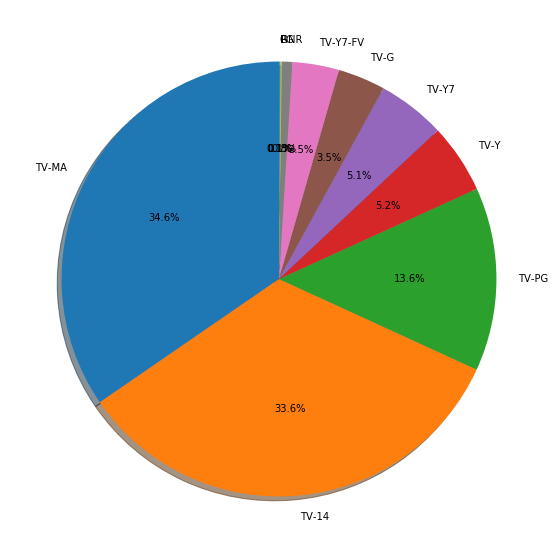

In [14]:
#NetFlix
labels = 'TV-MA', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'TV-G','TV-Y7-FV', 'NR','R', 'PG', 'G'
values = [677,657,267,101,99,69,68,15,2,1,1]
explode = (0, 0, 0, 0,0,0,0,0,0,0,0) 

plt.figure(figsize = (10,10))
plt.pie(values, explode=explode, labels=labels, autopct='%1.1f%%',shadow=True, startangle=90)
 

plt.show()

In [ ]:
hulu_values=data_hulu['rating'].value_counts()
hulu_values

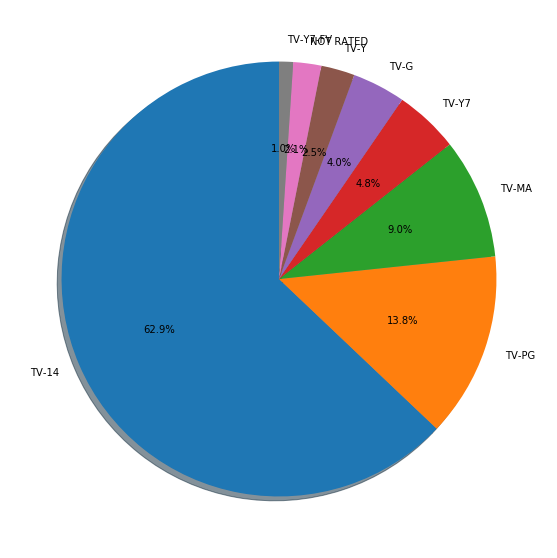

In [15]:
#Hulu
labels =  'TV-14', 'TV-PG', 'TV-MA','TV-Y7', 'TV-G','TV-Y', 'NOT RATED','TV-Y7-FV'
values = [604,132,86,46,38,24,20, 10]
explode = (0, 0, 0, 0,0,0,0,0) 

plt.figure(figsize = (10,10))
plt.pie(values, explode=explode, labels=labels, autopct='%1.1f%%',shadow=True, startangle=90)
 

plt.show()

TV-14        604
TV-PG        132
TV-MA         86
TV-Y7         46
TV-G          38
TV-Y          24
Not Rated     20
TV-Y7-FV      10
Name: rating, dtype: int64

In [17]:
### Question 3:  Compare how many TV Shows are in both services
netflixcount = data_netflix["type"]
hulucount = data_hulu["show_type"]

In [22]:
netflixcount_df = pd.DataFrame(netflixcount.value_counts())
netflixcount_df

,type
TV Show,1957


In [24]:
hulucount_df = pd.DataFrame(hulucount.value_counts())
hulucount_df

,show_type
show,960
